# Análise estatística de dados fluviométricos

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importar dados
dados = pd.read_excel('86480000_Vazoes.xlsx')

# Identificar tipos de dados (Dtype) 
dados.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data               806 non-null    datetime64[ns]
 1   NivelConsistencia  806 non-null    int64         
 2   Vazao01            802 non-null    float64       
 3   Vazao02            802 non-null    float64       
 4   Vazao03            801 non-null    float64       
 5   Vazao04            801 non-null    float64       
 6   Vazao05            801 non-null    float64       
 7   Vazao06            801 non-null    float64       
 8   Vazao07            801 non-null    float64       
 9   Vazao08            801 non-null    float64       
 10  Vazao09            802 non-null    float64       
 11  Vazao10            801 non-null    float64       
 12  Vazao11            801 non-null    float64       
 13  Vazao12            801 non-null    float64       
 14  Vazao13   

In [3]:
# Extrair dados de 1980 a 2015
dados = dados[dados['Data'] >= '1980-01-01']
dados = dados[dados['Data'] <= '2015-12-01']
dados = dados.reset_index()
dados = dados.drop('index', axis='columns') 

In [4]:
# Verificar se todos os dados são consistidos
print('O primeiro dado é consistido?', dados['NivelConsistencia'][0] == 2)
print('Todos os dados têm o mesmo nível de consistência?', 
      dados['NivelConsistencia'].nunique() == 1) 
dados = dados.drop('NivelConsistencia', axis='columns') 

O primeiro dado é consistido? True
Todos os dados têm o mesmo nível de consistência? True


In [5]:
# Transpor a matriz dos dados 
aux = dados.T
aux.columns = [data.strftime('%Y-%m') for data in dados['Data']]
aux = aux.drop('Data', axis='rows')
aux = aux.reset_index()
aux.index = aux.index + 1
aux = aux.drop('index', axis='columns')
aux = aux[aux.columns[::-1]]
aux.head()

,1980-01,1980-02,1980-03,1980-04,1980-05,1980-06,1980-07,1980-08,1980-09,1980-10,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
1,14.994,28.5004,7.5492,5.4368,3.1971,12.2938,20.3682,71.8557,48.6944,24.9823,...,28.3275,18.8686,16.4488,43.4549,35.1775,29.7993,7.6974,46.9553,22.7381,27.6026
2,13.8888,17.3029,7.5492,5.1603,6.3073,11.7793,18.5055,57.9156,206.7399,22.9597,...,21.4169,15.2883,15.2883,35.1775,30.5461,26.8852,8.1391,41.7448,20.1269,362.9848
3,12.817,10.288,7.5492,5.1603,10.7763,11.7793,15.5591,46.0515,144.235,20.3682,...,18.8686,13.0685,13.0685,31.3001,29.0597,29.7993,7.3645,47.847,26.1751,278.6972
4,11.2734,8.4251,9.8087,4.6279,10.288,10.7763,14.994,38.4754,112.8864,19.1186,...,16.4488,10.4899,46.9553,27.6026,29.0597,23.4103,7.6974,35.1775,22.0736,125.3792
5,9.8087,7.5492,9.3383,4.3721,9.8087,10.7763,14.994,27.0714,61.7778,17.9002,...,25.4726,56.1646,33.6053,24.0901,25.4726,22.0736,7.0393,31.3001,26.8852,85.2609


In [6]:
# Verificar se os dados contêm todos os meses de 1980 a 2015
datas = pd.date_range(start='1980-01-01', end='2015-12-31', freq='ME')
len(datas) == len(aux.columns)

True

In [7]:
# Reorganizar as vazões diárias
datas = pd.date_range(start='1980-01-01', end='2015-12-31', freq='D')
aux1 = pd.DataFrame()
aux1['Data'] = [data.strftime('%Y-%m-%d') for data in datas]
aux1['Vazão'] = [0.0]*len(aux1['Data'])
add_zero = lambda x: f'{0}{x}' if x<10 else x
linha = 0
for j in range(len(aux.columns)):
    for i in range(len(aux.index)):
        if str(aux.columns[j]) +'-'+ str(add_zero(aux.index[i])) == aux1.loc[linha, 'Data']:
            aux1.loc[linha, 'Vazão'] = aux.iloc[i, j]
        else:
            continue
        linha = linha+1
aux1.replace(0.0, 'NaN', inplace=True) 
aux1['Data'] = pd.to_datetime(aux1['Data'], format='%Y-%m-%d')
aux1['log(Vazão)'] = np.log10(aux1['Vazão'])
aux1.head()

,Data,Vazão,log(Vazão)
0,1980-01-01,14.9940,1.175918
1,1980-01-02,13.8888,1.142665
2,1980-01-03,12.8170,1.107786
3,1980-01-04,11.2734,1.052055
4,1980-01-05,9.8087,0.991611


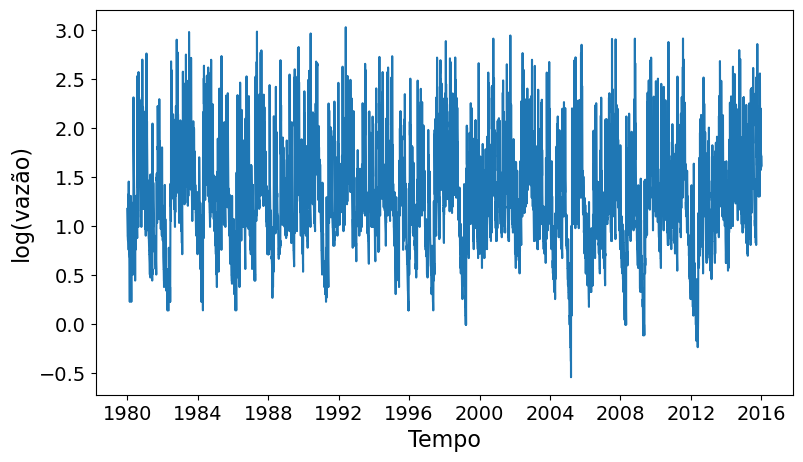

In [10]:
# Hidrograma 
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(aux1['Data'], aux1['log(Vazão)'])
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.xlabel('Tempo', fontsize=16)
plt.ylabel('log(vazão)', fontsize=16)
#plt.savefig('hidrograma_diario.png', bbox_inches='tight')
plt.show()